## Step 1/2. Data organization and preparation / Etapa 1/2. Organização e preparação dos dados

In [293]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

# reading the data in the VSCode below / leitudas dados no VSCode abaixo:
# after checking the data, sep = ',' was added to make the data display more organized / após verificação dos dados, foi adicionado o sep = ',' para deixar a visualização dos dados mais organizada

df_games = pd.read_csv(r'C:\Users\Rafael\Desktop\Rafael\Bootcamp\Bootcamp-Projects\Bootcamp-Projects-Github\Bootcamp-Project-Video-Games-Ice-Company\games.csv', sep = ',')

# reading the datasets in DataFrames / leitura dos conjuntos de dados em DataFrames

# df_games = pd.read_csv('/Users/Rafael/Desktop/Rafael/Bootcamp/Projects/Bootcamp-Projects-Github/Bootcamp-Project-Video-Games-Ice-Company/games.csv', sep = ',')

In [294]:
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [295]:
df_games.info() # information about the dataset / informação sobre o conjunto de dados
print()
df_games.isnull().sum() # sum of null values / soma de valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [296]:
df_games.duplicated().sum()

np.int64(0)

Checking the data it's possible to see that we don't have duplicate values, but have null values in different columns and the names are with the initial letter in uppercase

================================================================================================================

Checando os dados podemos verificar que não existem valores duplicados, porém temos valores nulos em diferentes colunas e as colunas tem a letra inicial maiúscula

In [297]:
df_games.columns # columns name / nomes

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [298]:
header = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']
header_low = []

for data in header:
    header_low.append(data.lower()) # lower case columns / letras minúsculas nas colunas

df_games.columns = header_low

df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [299]:
# replacing null values with 'Unknown' or '0' / substituindo valores nulos por 'Unknown' ou '0'

df_games['name'] = df_games['name'].fillna('Unknown')
df_games['year_of_release'] = df_games['year_of_release'].fillna(0)
df_games['genre'] = df_games['genre'].fillna('Unknown')
df_games['critic_score'] = df_games['critic_score'].fillna(0)
df_games['user_score'] = df_games['user_score'].fillna(0)
df_games['rating'] = df_games['rating'].fillna('Unknown')

df_games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [300]:
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = df_games['critic_score'] / 10 # replacing 'tbd' with similar critic score / substituindo 'tbd' por nota similar ao critic score

It was possible to identify that the user critic is very similar to the critical score and that if we leave the tbd we will have problems later on in the analysis (a problem I had because it was not possible to build a graph due to having this data as str), replaced by the score which is similar so that it is possible to check the data we have.

In a real project, in order to know what to do with this data, the team responsible would be asked and would discuss with them what substitution to make or how to leave this data.

================================================================================================================

Foi possível identificar que a user critic é muito semelhante a nota do critic score e uma vez que se deixar o tbd teremos problema mais a frente na análise (problema que tive por não ser possível construir um gráfico devido ter este dado como str), substituído pela nota que é semelhante de modo a ser possível fazer uma verificação dos dados que temos.

Em um projeto real, para saber o que fazer com estes dados seria questionado a equipa responsável e discutido com os mesmo qual substituição a ser feita ou como deixar este dado.

In [301]:
# changing data type / mudando o tipo dos dados

df_games['year_of_release'] = df_games['year_of_release'].astype(int)
df_games['critic_score'] = df_games['critic_score'].astype(int)
df_games['user_score'] = df_games['user_score'].astype(float)

In [335]:
# sum of the total sales of each region and adding a new column / soma de vendas de cada região e adicionando em uma nova coluna

df_games['total_sales'] = (df_games['na_sales'] +
                           df_games['eu_sales'] +
                           df_games['jp_sales'] +
                           df_games['other_sales'])

print(df_games[['name', 'total_sales']])

                                name  total_sales
0                         Wii Sports        82.54
1                  Super Mario Bros.        40.24
2                     Mario Kart Wii        35.52
3                  Wii Sports Resort        32.77
4           Pokemon Red/Pokemon Blue        31.38
...                              ...          ...
16710  Samurai Warriors: Sanada Maru         0.01
16711               LMA Manager 2007         0.01
16712        Haitaka no Psychedelica         0.01
16713               Spirits & Spells         0.01
16714            Winning Post 8 2016         0.01

[16715 rows x 2 columns]


Above, the first step was change all the uppercase letters to lowercase. After this adjustment, was replaced all the null values with 'Unknown' or '0' based in the column information and in the user_score column was changed the 'tbd' (to be determined) to '0'. The last change at the dataset was adjust the columns type to the more appropriated.

The columns that we have numbers, the null values was changed to 0 because it's the value that makes the most sense and won't get in the way if you need to use the data to make a sum and to the columns that have written information was changed to unknown once has not a important information and it's better to have a unkown than leave NaN or blank.

The columns year_of_release and critic_score, was changed the type to int because the year will never have decimals and the critic score is always a entire value without decimals.

Null values may occur because the data set is from 2016 and some information may have been lost.

================================================================================================================

Acima, a primeira etapa foi alterar todas as letras maiúsculas para minúsculas. Após esse ajuste, todos os valores nulos foram substituídos por 'Unknown' ou '0' com base nas informações da coluna e, na coluna user_score, o valor 'tbd' (a ser determinado) foi alterado para '0'. A última alteração no conjunto de dados foi ajustar o tipo das colunas para o mais apropriado.

As colunas que tinham número, os valores nulos foram altetados para 0, pois é o valor que faz mais sentido e não irá atrapalhar se caso seja necessário usar os dados para fazer uma soma e as colunas que os dados são escritos foram alterados para unknown uma vez que não havia informação importante para a adicionar e também por ser melhor do que deixar apenas NaN ou em branco.

As colunas year_of_release and critic_score, foram alteradas para o tipo int porque um ano nunca terá casas decimais e a nota dos críticos são sempre um valor inteiro sem decimais.

Os valores nulos podem ocorrer porque o conjunto de dados é de 2016 e pode ser que algumas informações foram perdidas.

## Step 3. Analyze the data / Etapa 3. Analise os dados

In [303]:
df_year_of_release = df_games.groupby('year_of_release')['name'].count().reset_index() # count of games per year / contagem de jogos por ano
df_year_of_release

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


## See how many games were released in different years Is the data for each period significant?

The '0' are the games that we don't know the year of release, but the other games has a variation between the years where some years has more games released than the previous year or vice versa. We can notice too that in the 90's started to have a grow up at the games released but the number get really higher in the 2010's.  

================================================================================================================

## Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?

Os '0' são os jogos que não sabemos o ano de lançamento, mas os outros jogos têm uma variação entre os anos, em que alguns anos têm mais jogos lançados do que no ano anterior ou vice-versa. Podemos notar também que na década de 90 começou a haver um crescimento nos jogos lançados, mas o número ficou realmente maior na década de 2010. 

In [304]:
#creating separated dataframes for each decade / criando conjuntos de dados separados para cada década

df_80_decade = df_games.query('year_of_release >= 1980 and year_of_release < 1990')
df_90_decade = df_games.query('year_of_release >= 1990 and year_of_release < 2000')
df_2000_decade = df_games.query('year_of_release >= 2000 and year_of_release < 2010')
df_2010_decade = df_games.query('year_of_release >= 2010')

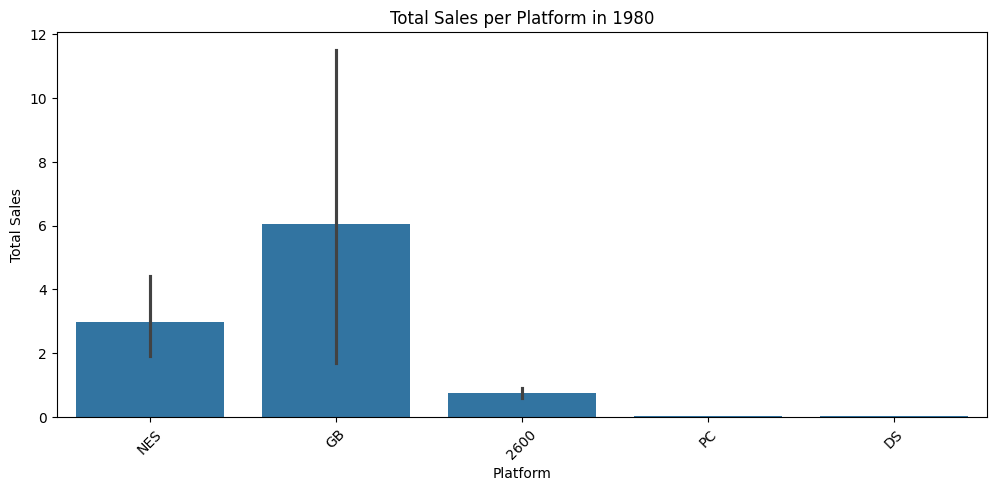

In [305]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'platform', y = 'total_sales', data = df_80_decade)
plt.title('Total Sales per Platform in 1980')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

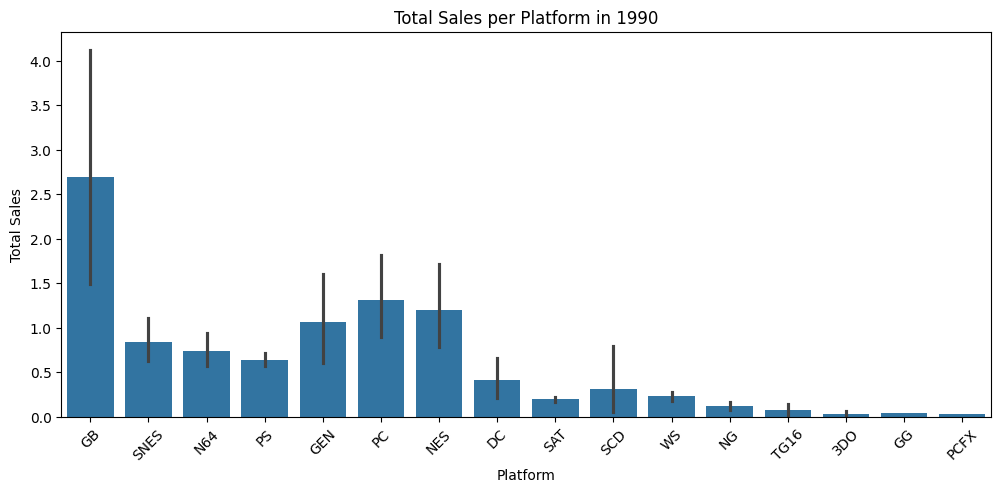

In [306]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'platform', y = 'total_sales', data = df_90_decade)
plt.title('Total Sales per Platform in 1990')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

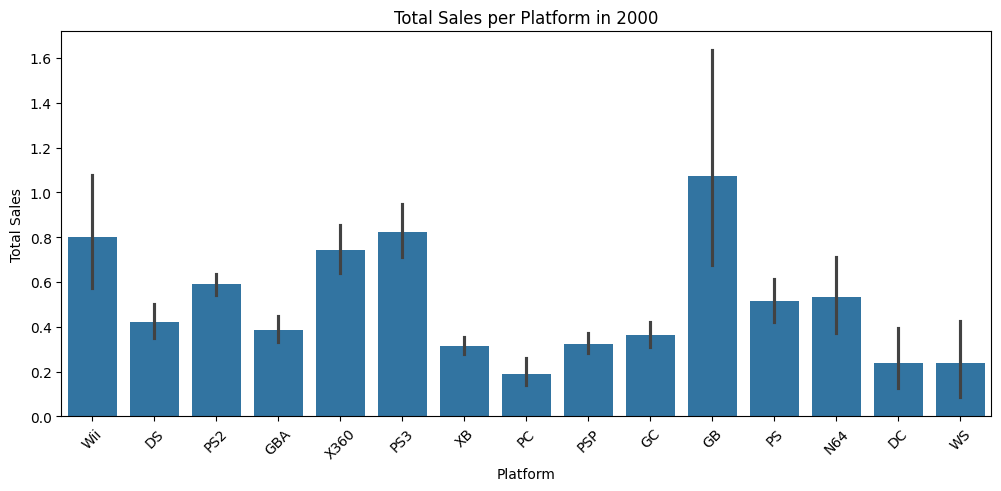

In [307]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'platform', y = 'total_sales', data = df_2000_decade)
plt.title('Total Sales per Platform in 2000')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

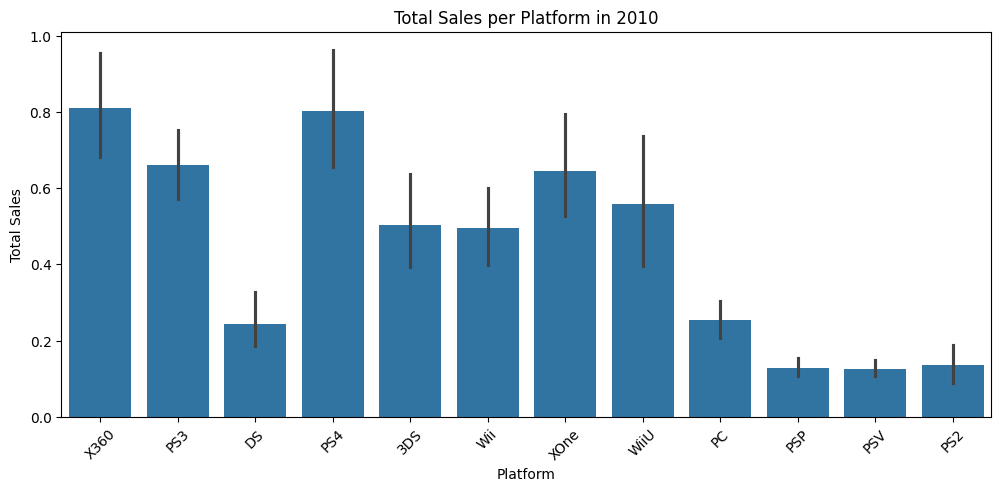

In [308]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'platform', y = 'total_sales', data = df_2010_decade)
plt.title('Total Sales per Platform in 2010')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## See how sales varied from platform to platform. Choose the platforms with the highest total sales and build a distribution based on data for each year. Find the platforms that used to be popular but now have no sales. How long does it take for new platforms to appear and old ones to disappear?

I've made a selection of the data for each decade and selected the 5 platforms that had the most sales at the time, so that we can analyze which ones emerged in that period and how sales are doing. In the 1980s, we can see that it was still the early days of video games and with that we only have 3 platforms in evidence (NES, GB, 2600), however, when we move on to the 1990s we notice that there has been a significant increase in the number of gaming platforms, with the emergence of new platforms but with some of the previous ones still on the rise (GB, NES, PC, GEN, SNES). When we look at the 2000s, the number of platforms is similar, but with many changes, with new platforms appearing and some old ones no longer on the rise, and we can see that in the top 5 sales only the GB has remained (GB, PS3, X360, Wii, PS2). For the last period of data, we note that we have many platforms similar to 2000, but the emergence of newer models that are growing, with the PS3 and X360 (X360, PS3, PS4, WiiU, XOne) remaining in the top 5 for another period.

================================================================================================================

## Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

Fiz uma seleção dos dados por cada década e selecionei as 5 plataformas que tinham mais venda na altura, de modo que podemos analisar quais foram as que surgiram naquele período e como estão a ser as vendas. Na década de 80, notamos que ainda estava a ser o início dos vídeo-games e com isso temos apenas 3 plataformas em evidência (NES, GB, 2600), contudo, ao passar para a década de 90 reparamos que houve um aumento significativo no número de plataformas de jogos, tendo o surgimento de novas plataformas porém ainda se mantendo em alta algumas anteriores (GB, NES, PC, GEN, SNES). Quando olhamos para a década de 2000, o número de plataformas é semelhante, porém com muitas mudanças tendo novas plataformas surgido e algumas antigas deixadas de estar em alta, podendo reparar que no top 5 de vendas apenas se manteve o GB (GB, PS3, X360, Wii, PS2). Para o último período dos dados, notamos que temos muitas plataformas semelhantes a 2000, mas o surgimento dos modelos mais recentes e que estão em crescimento, tendo se mantido no top 5 por mais um período o PS3 e o X360 (X360, PS3, PS4, WiiU, XOne)

In [309]:
df_sales_per_plataform = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index() # sum of sales per platform per year / soma de vendas por plataforma por ano

df_sales_per_plataform

,platform,year_of_release,total_sales
0,2600,0,10.50
1,2600,1980,11.38
2,2600,1981,35.68
3,2600,1982,28.88
4,2600,1983,5.84
...,...,...,...
249,XB,2008,0.18
250,XOne,2013,18.96
251,XOne,2014,54.07
252,XOne,2015,60.14


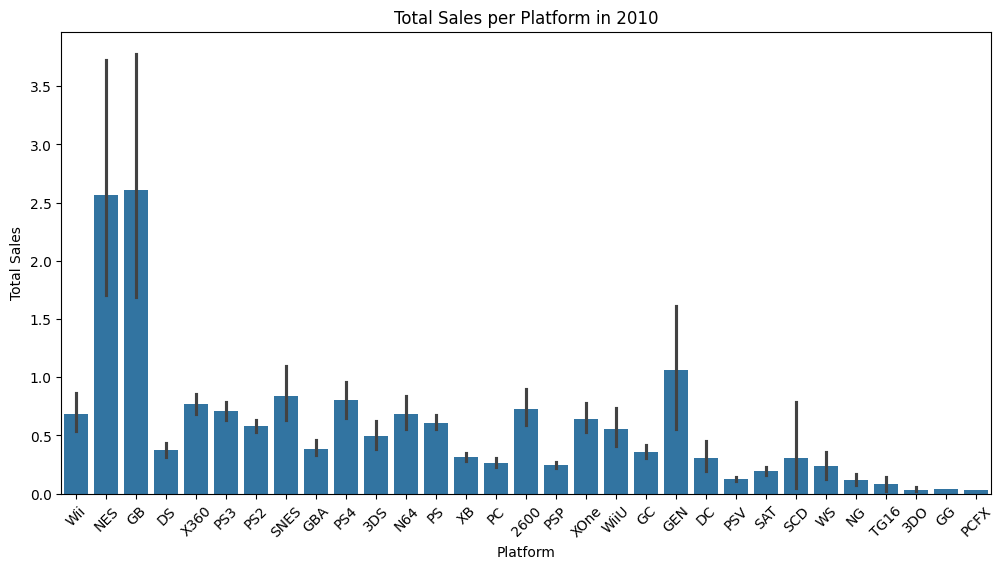

In [310]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'platform', y = 'total_sales', data = df_games)
plt.title('Total Sales per Platform in 2010')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## Determine for which period you should take data. To do this, look at your answers to the previous questions. The data should allow you to build a model for 2017.

Thinking about building a model for 2017, it's not worth taking old data, but we can consider the data we have from the same decade to be able to analyze in a more complete way which platforms are on the rise or not, and the same thing with games.

================================================================================================================

## Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

Pensando em construir um modelo para 2017, não vale a pena pegar dados antigos, porém podemos considerar os dados que temos da mesma década para conseguir analisar de uma forma mais completa quais plataformas estão ou não em ascensão e a mesma coisa com os jogos.


In [311]:
df_2010_decade # printing dataframe to see the data that will be used / imprimindo dataframe para ver os dados que utilizaremos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,0,0.0,Unknown,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,Unknown,0.01


In [312]:
df_sales_per_plataform_2010 = df_2010_decade.groupby('platform')['total_sales'].count().reset_index() # count of games per platform / contagem de jogos por plataforma

df_sales_per_plataform_2010_sorted = df_sales_per_plataform_2010.sort_values(by = 'total_sales', ascending = True) # sorting values / ordenando os valores

df_sales_per_plataform_2010_sorted

,platform,total_sales
3,PS2,45
9,WiiU,147
11,XOne,247
5,PS4,392
7,PSV,429
8,Wii,450
2,PC,479
6,PSP,500
1,DS,507
0,3DS,512


## Which platforms are leading in sales? Which are growing or shrinking? Select several potentially profitable platforms.

We can see that the X360 and PS3 platforms lead the ranking with the highest number of sales since 2010, even though there are newer and more recently launched platforms such as XOne and PS4. In addition, portable platforms such as PSP and DS are also on the rise.

However, considering the games to be released in 2017 (information we always have in advance and usually a year or half a year in advance), we should consider the recently released platforms, XOne and Ps4, will be potentially profitable and along with these we can add the PC, as it was starting to stop being the main use with issues related to banking or surfing the internet.

================================================================================================================

## Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

Podemos ver que as plataformas X360 e PS3 lideram o ranking com o maior número de vendas desde 2010, mesmo que já existam plataformas mais novas e lançadas mais recente como XOne e PS4. Além disso, as plataformas portátil como PSP e DS também estão em alta.

Contudo, considerando os jogos a serem lançados em 2017 (informações que temos sempre adiantadas e normalmente com um ano ou meio ano de antecedência), devemos considerar as plataformas lançadas recentemente, XOne e Ps4, serão potencialmente lucrativas e junto a essas podemos adicionar o PC, pois estava começando a deixar de ser o principal uso com questões relacionadas a bancos ou navegar na internet.

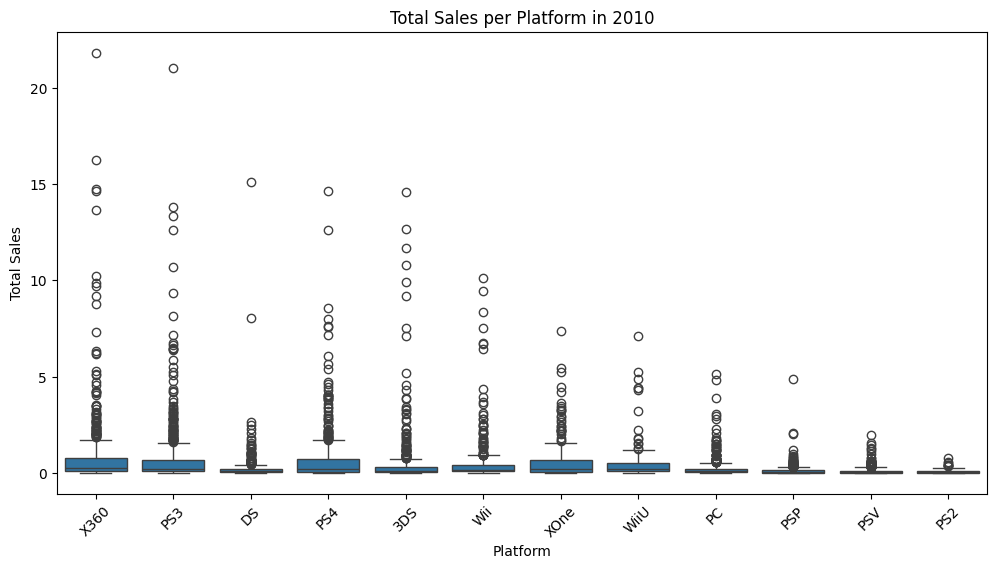

In [313]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'platform', y = 'total_sales', data = df_2010_decade)
plt.title('Total Sales per Platform in 2010')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [314]:
mean_sales_2010 = df_2010_decade.groupby('platform')['total_sales'].mean()
mean_sales_2010 = mean_sales_2010.sort_values(ascending = True)
mean_sales_2010

platform
PSV     0.125431
PSP     0.128100
PS2     0.135333
DS      0.244083
PC      0.254614
Wii     0.495489
3DS     0.503535
WiiU    0.559116
XOne    0.645020
PS3     0.661125
PS4     0.801378
X360    0.809426
Name: total_sales, dtype: float64

## Build a box diagram for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales across platforms? Describe your findings.

It's possible to see that there is a difference in sales between console platforms and portable video games and PCs, but if we compare them we can see that there is a difference between older platforms and newer ones, where the newer ones have more sales than the older ones.

As for average sales, as mentioned above, the most recently launched platforms have higher average sales than previous models, showing that they are on the rise for the coming years.

================================================================================================================

## Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

É possível identificar que existe uma diferença nas vendas entre as plataformas de console para os video games portáteis e PC, contudo, se compararmos entre elas próprias podemos verificar que há uma diferença entre plataformas mais antigas e as plataformas mais recentes, onde as mais novas tem uma quantidade maior de venda em relação as antigas.

Quanto às médias das vendas, como citado anteriormente, as plataformas lançadas mais recente tem uma maior média de venda do que modelos anteriores, mostrando que estão em ascensão para os próximos anos.

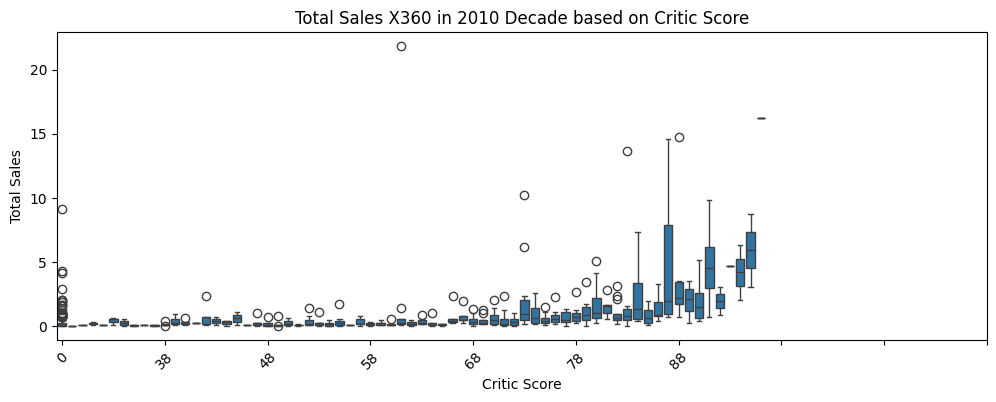

In [315]:
df_X360 = df_2010_decade[df_2010_decade['platform'] == 'X360'] # filter dataframe by X360 platform / filtrar dataframe pela plataforma X360

plt.figure(figsize = (12,4))
sns.boxplot(x = 'critic_score', y = 'total_sales', data = df_X360)
plt.title('Total Sales X360 in 2010 Decade based on Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.xticks(ticks = range(0, 97, 10))
plt.xticks(rotation=45)
plt.show()

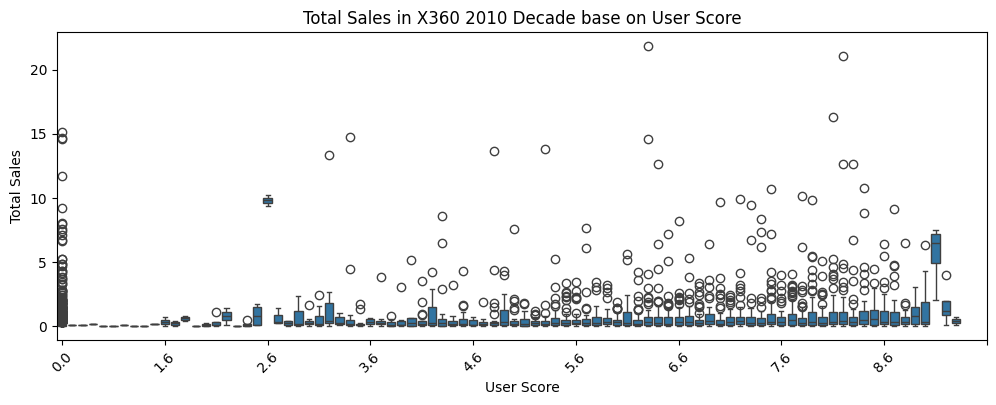

In [316]:
plt.figure(figsize = (12,4))
sns.boxplot(x = 'user_score', y = 'total_sales', data = df_2010_decade)
plt.title('Total Sales in X360 2010 Decade base on User Score')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.xticks(ticks = range(0, 97, 10))
plt.xticks(rotation=45)
plt.show()

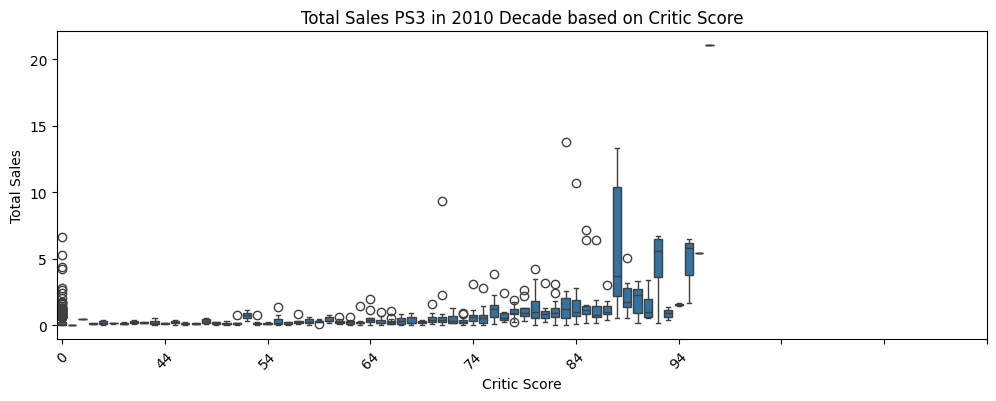

In [317]:
# creating dataframe for PS3 to compare the datas from X360 / criando dataframe para PS3 para comparar os dados do X360

df_PS3 = df_2010_decade[df_2010_decade['platform'] == 'PS3'] # filter dataframe by PS3 platform / filtrar dataframe pela plataforma PS3

plt.figure(figsize = (12,4))
sns.boxplot(x = 'critic_score', y = 'total_sales', data = df_PS3)
plt.title('Total Sales PS3 in 2010 Decade based on Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.xticks(ticks = range(0, 97, 10))
plt.xticks(rotation=45)
plt.show()

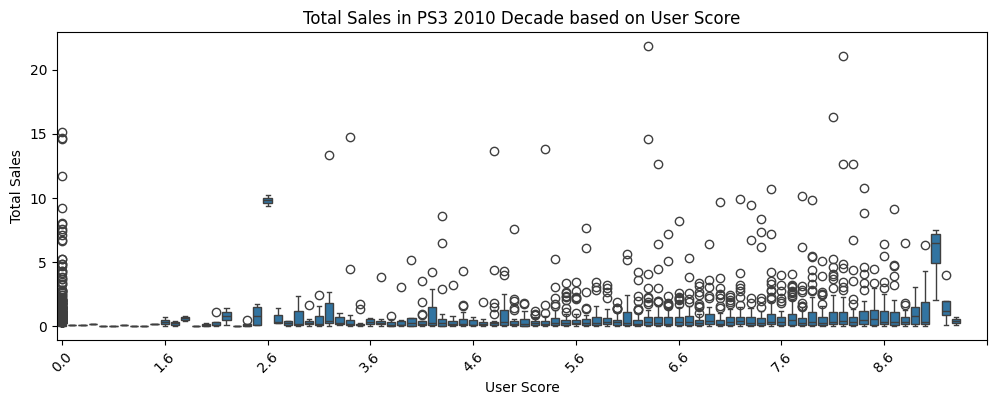

In [318]:
plt.figure(figsize = (12,4))
sns.boxplot(x = 'user_score', y = 'total_sales', data = df_2010_decade)
plt.title('Total Sales in PS3 2010 Decade based on User Score')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.xticks(ticks = range(0, 97, 10))
plt.xticks(rotation=45)
plt.show()

In [319]:
genre_sales_2010 = df_2010_decade.groupby('genre')['total_sales'].sum().reset_index() # total sales per genre / vendas totais por genero

genre_sales_2010 = genre_sales_2010.sort_values(by = 'total_sales', ascending = False) # sorting values / ordenando os valores

genre_sales_2010

,genre,total_sales
0,Action,673.09
8,Shooter,479.74
10,Sports,328.39
7,Role-Playing,315.28
3,Misc,234.56
6,Racing,122.68
4,Platform,119.72
2,Fighting,81.59
9,Simulation,71.75
1,Adventure,61.00


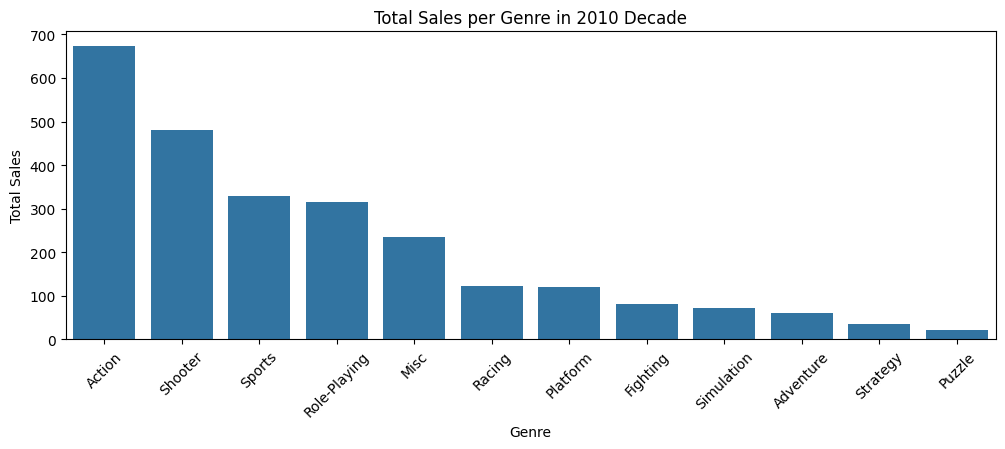

In [320]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'genre', y = 'total_sales', data = genre_sales_2010)
plt.title('Total Sales per Genre in 2010 Decade')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## Analysis of reviews and sales on gaming platforms  

- See how user and professional reviews affect sales on a popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- With these conclusions in mind, compare sales on other platforms.
- Take a look at the overall distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

The platform chosen was X360. It can be seen that based on the critics' scores, the games with the highest scores have the highest sales, while the games with much lower than average scores have very small sales. However, when we look at sales based on user ratings, the games with the highest ratings still have a lot of sales, but we can see that the games with the lowest ratings still have more sales than in the graph where we used the critics' ratings. In this way, we can conclude that there is a difference in sales based on the scores, but we can't take this into account since in one of the graphs, even with the lowest scores, we have an ok amount of sales.

Compared to the sales of other platforms, in this case I've selected the PS3, which has the most sales, we can see that the data based on the critics' and users' scores are very similar in general, and we can draw the conclusion that the scores may influence sales, but that's not what makes the game sell more or less.

On the subject of genres, we can see that the most profitable genres are generally more generic and appealing to the general public, even today, while when we leave the top 5 we realize that they end up being games for a more specific niche. If we take the data and the graph into account, we can say that we can generalize which games sell more or less, but a game from a genre with low sales in general can sell just as much as a game from a genre in the Top 5 and just not appear as much in the overall statistics because of the overall average sales.

================================================================================================================

## Análise das avaliações e vendas em plataformas de jogos  

- Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.
- Com essas conclusões em mente, compare as vendas em outras plataformas.
- Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

Plataforma escolhida foi  X360. Pode-se identificar que baseado na nota dos críticos, os jogos com maior nota tem uma maior volume de vendas, enquanto os jogos que as notas são bem mais baixas que a média tem um volume de venda muito pequeno. Contudo, ao verificar as vendas com base na nota de usuários, os jogos com maior nota tem bastante vendas ainda, porém podemos ver que os ogos com menores notas ainda tem mais vendas do que no gráfico em que usamos a nota dos críticos. Deste modo, podemos concluir que existe sim uma diferença nas vendas baseado nas notas, porém não podemos levar isso em consideração uma vez que em um dos gráficos mesmo nas notas mais baixas temos uma quantidade ok de vendas.

Comparando com a venda de outras plataformas, neste caso selecionei o PS3 que é a que tem mais vendas, vemos que os dados com base nas notas dos críticos e dos usuários são bem parecidos de modo geral, podendo tirar a conclusão de que as notas podem sim influenciar nas vendas, mas não será isso que faz com que o jogo venda mais ou menos.

Referente a questão dos gêneros, podemos ver que os gêneros mais lucrativos são de modo geral mais genérico e de agrado do público geral, até mesmo nos dias de hoje, enquanto ao deixar o top 5 percebemos que acabam por ser jogos para um nicho mais específico. Se levarmos em consideração os dados e o gráfico montado podemos dizer que podemos generalizar os que vendem mais ou menos, porém um jogo de um gênero com uma venda baixa de modo geral pode ser tão vendido quanto o de um gênero do Top 5 e apenas não aparecer tanto na estatística geral por conta da média geral das vendas.

## Step 4. Create a user profile for each region / Etapa 4. Crie um perfil de usuário para cada região

In [321]:
df_na_sales_platform = df_2010_decade.groupby(['platform', 'genre', 'rating'])['na_sales'].sum().reset_index() # creating dataframe for NA sales / criando dataframe para vendas em NA
df_eu_sales_platform = df_2010_decade.groupby(['platform', 'genre', 'rating'])['eu_sales'].sum().reset_index() # creating dataframe for EU sales / criando dataframe para vendas em EU
df_jp_sales_platform = df_2010_decade.groupby(['platform', 'genre', 'rating'])['jp_sales'].sum().reset_index() # creating dataframe for JP sales / criando dataframe para vendas em JP

In [322]:
df_na_platform_sales =df_2010_decade.groupby('platform')['na_sales'].sum().reset_index() # total sales in NA per platform / vendas totais por plataforma em NA
df_na_platform_sales = df_na_platform_sales.sort_values(by = 'na_sales', ascending = False)

df_na_platform_sales.head(5)

,platform,na_sales
10,X360,334.18
4,PS3,229.25
8,Wii,121.20
5,PS4,108.74
11,XOne,93.12


In [323]:
df_eu_platform_sales = df_2010_decade.groupby('platform')['eu_sales'].sum().reset_index() # total sales in EU per platform / vendas totais por plataforma em EU
df_eu_platform_sales = df_eu_platform_sales.sort_values(by = 'eu_sales', ascending = False)

df_eu_platform_sales.head(5)

,platform,eu_sales
4,PS3,213.60
10,X360,163.41
5,PS4,141.09
2,PC,68.82
8,Wii,65.91


In [324]:
df_jp_platform_sales = df_2010_decade.groupby('platform')['jp_sales'].sum().reset_index() # total sales in JP per platform / vendas totais por plataforma em JP
df_jp_platform_sales = df_jp_platform_sales.sort_values(by = 'jp_sales', ascending = False)

df_jp_platform_sales.head(5)

,platform,jp_sales
0,3DS,100.62
4,PS3,59.26
6,PSP,42.20
1,DS,27.90
7,PSV,21.84


In [325]:
df_top_na_genre = df_na_sales_platform.groupby('genre')['na_sales'].sum().reset_index()

df_top_na_genre = df_top_na_genre.sort_values(by = 'na_sales', ascending = False)

df_top_na_genre.head(5)

,genre,na_sales
0,Action,290.64
8,Shooter,237.47
10,Sports,156.81
3,Misc,123.80
7,Role-Playing,112.05


In [326]:
df_top_eu_genre = df_eu_sales_platform.groupby('genre')['eu_sales'].sum().reset_index()

df_top_eu_genre = df_top_eu_genre.sort_values(by = 'eu_sales', ascending = False)

df_top_eu_genre.head(5)

,genre,eu_sales
0,Action,233.63
8,Shooter,171.45
10,Sports,116.84
7,Role-Playing,75.48
3,Misc,66.09


In [327]:
df_top_jp_genre = df_jp_sales_platform.groupby('genre')['jp_sales'].sum().reset_index()

df_top_jp_genre = df_top_jp_genre.sort_values(by = 'jp_sales', ascending = False)

df_top_jp_genre.head(5)

,genre,jp_sales
7,Role-Playing,103.54
0,Action,72.20
3,Misc,24.29
4,Platform,15.81
1,Adventure,15.67


In [332]:
df_rating_na = df_na_sales_platform.groupby('rating')['na_sales'].sum().reset_index()

df_rating_na = df_rating_na.sort_values(by = 'na_sales', ascending = False)

df_rating_na

,rating,na_sales
3,M,382.22
0,E,271.15
5,T,160.81
1,E10+,159.38
6,Unknown,155.72
2,EC,1.13
4,RP,0.00


In [333]:
df_rating_eu = df_eu_sales_platform.groupby('rating')['eu_sales'].sum().reset_index()

df_rating_eu = df_rating_eu.sort_values(by = 'eu_sales', ascending = False)

df_rating_eu

,rating,eu_sales
3,M,292.04
0,E,197.34
6,Unknown,139.44
5,T,113.08
1,E10+,99.28
4,RP,0.03
2,EC,0.00


In [334]:
df_rating_jp = df_jp_sales_platform.groupby('rating')['jp_sales'].sum().reset_index()

df_rating_jp = df_rating_jp.sort_values(by = 'jp_sales', ascending = False)

df_rating_jp

,rating,jp_sales
6,Unknown,171.49
0,E,47.87
5,T,42.11
3,M,30.45
1,E10+,13.22
2,EC,0.00
4,RP,0.00


## For each region (AN, EU, JP), determine:

- The five main platforms. Describe the variations in their market shares from region to region.
- The five main genres. Explain the difference.
- Do the ESRB rankings affect sales in individual regions?

The top 5 in NA and EU are basically the same, with only one difference in one of the platforms, where in NA it's a console that completes the top 5 and in EU the PC starts to appear. Comparing these two regions, despite having similar platforms, sales are totally different. NA is the region with the highest number of sales, with PS3/PS4 sales similar to the EU, but a big difference when compared to the X360. The top 5 in JP has only one platform similar to the other regions (PS3), but the number of sales is much lower. In addition, we can see that the top 1 in this region is a portable console, unlike the other regions which are consoles. In addition, JP is the region with the fewest sales overall.

As for the main genres, in NA and EU the top 5 is basically the same, with only a change in the fourth and fifth positions, where in NA it's Misc and Role-Playing, respectively, and in EU the opposite. In JP we have a top 5 with 3 genres that are the same as the others and two that are different. Role-Playing / Action / Misc are the same and Platform and Adventure are different. The ranking is exactly in this order and in general, the only genre that is unanimous in the top 2 of all regions is Action.

When looking at whether the ESBR rating affects sales individually in the regions, we can see that the “M” and “E” ratings dominate sales in the NA and EU regions. This indicates that although there is a strong market for family games, the adult audience has a significant share of total sales, especially for games aimed at a more mature audience (“M” rating). With the data we have, the Japanese market has a slightly different scenario as the list contains many titles with an “Unknown” rating, which may reflect differences in the way games are rated or actually the lack of this data in the data set we have. In addition, games with an “E” (Everyone) rating are the most popular among the rated titles.

================================================================================================================

## Para cada região (AN, UE, JP), determine:

- As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.
- Os cinco principais gêneros. Explique a diferença.
- As classificações do ESRB afetam as vendas em regiões individuais?

O top 5 de NA e EU é basicamente o mesmo, tendo apenas uma diferença em uma das plataformas, onde em NA é um console que completa o top 5 e em EU o PC começa a aparecer. Comparando essas duas regiões, apesar de terem plataformas semelhantes as vendas são totalmente diferentes. NA é a região com um maior número de vendas tendo a venda de PS3/PS4 semelhante com EU, mas uma grande diferença quando comparado o X360. Já o top 5 JP tem apenas uma plataforma semelhante as demais regiões (PS3), porém o número de venda muito menor. Além disso, podemos notar que o top 1 dessa região é um console portátil, diferente das outras regiões que são consoles. Além disso, JP é a região com menos venda de modo geral.

Os principais gêneros, em NA e EU o top 5 é basicamente o mesmo, tendo apenas uma troca na quarta e quinta posição em que em NA é Misc e Role-Playing, respectivamente, e em EU o contrário. Já em JP temos um top 5 com 3 gêneros iguais as demais e outros dois diferentes. Temos como igual Role-Playing / Action / Misc e de diferente temos Platform e Adventure. O ranking está exatamente nesta ordem e de modo geral, o único gênero que é unânime no top 2 de todas as regiões, é o Action.

Ao olhar se a classificação ESBR afetam as vendas individualmente nas regiões, podemos notar que as classificações "M" e "E" dominam as vendas nas regiões NA e EU. Isso indica que, embora haja um forte mercado para jogos familiares, o público adulto tem uma participação significativa nas vendas totais, especialmente para jogos voltados para um público mais maduro (classificação "M"). Com os dados que temos, o mercado japonês tem um cenário um pouco diferente por na lista ter muitos títulos com classificação "Unknown", que pode refletir diferenças na forma como os jogos são classificados ou realmente a falta deste dado neste conjunto de dados que temos. Além disso, jogos com classificação "E" (Everyone) são os mais populares entre os títulos classificados.

## Step 5. Hypothesis testing / Etapa 5. Teste de hipóteses